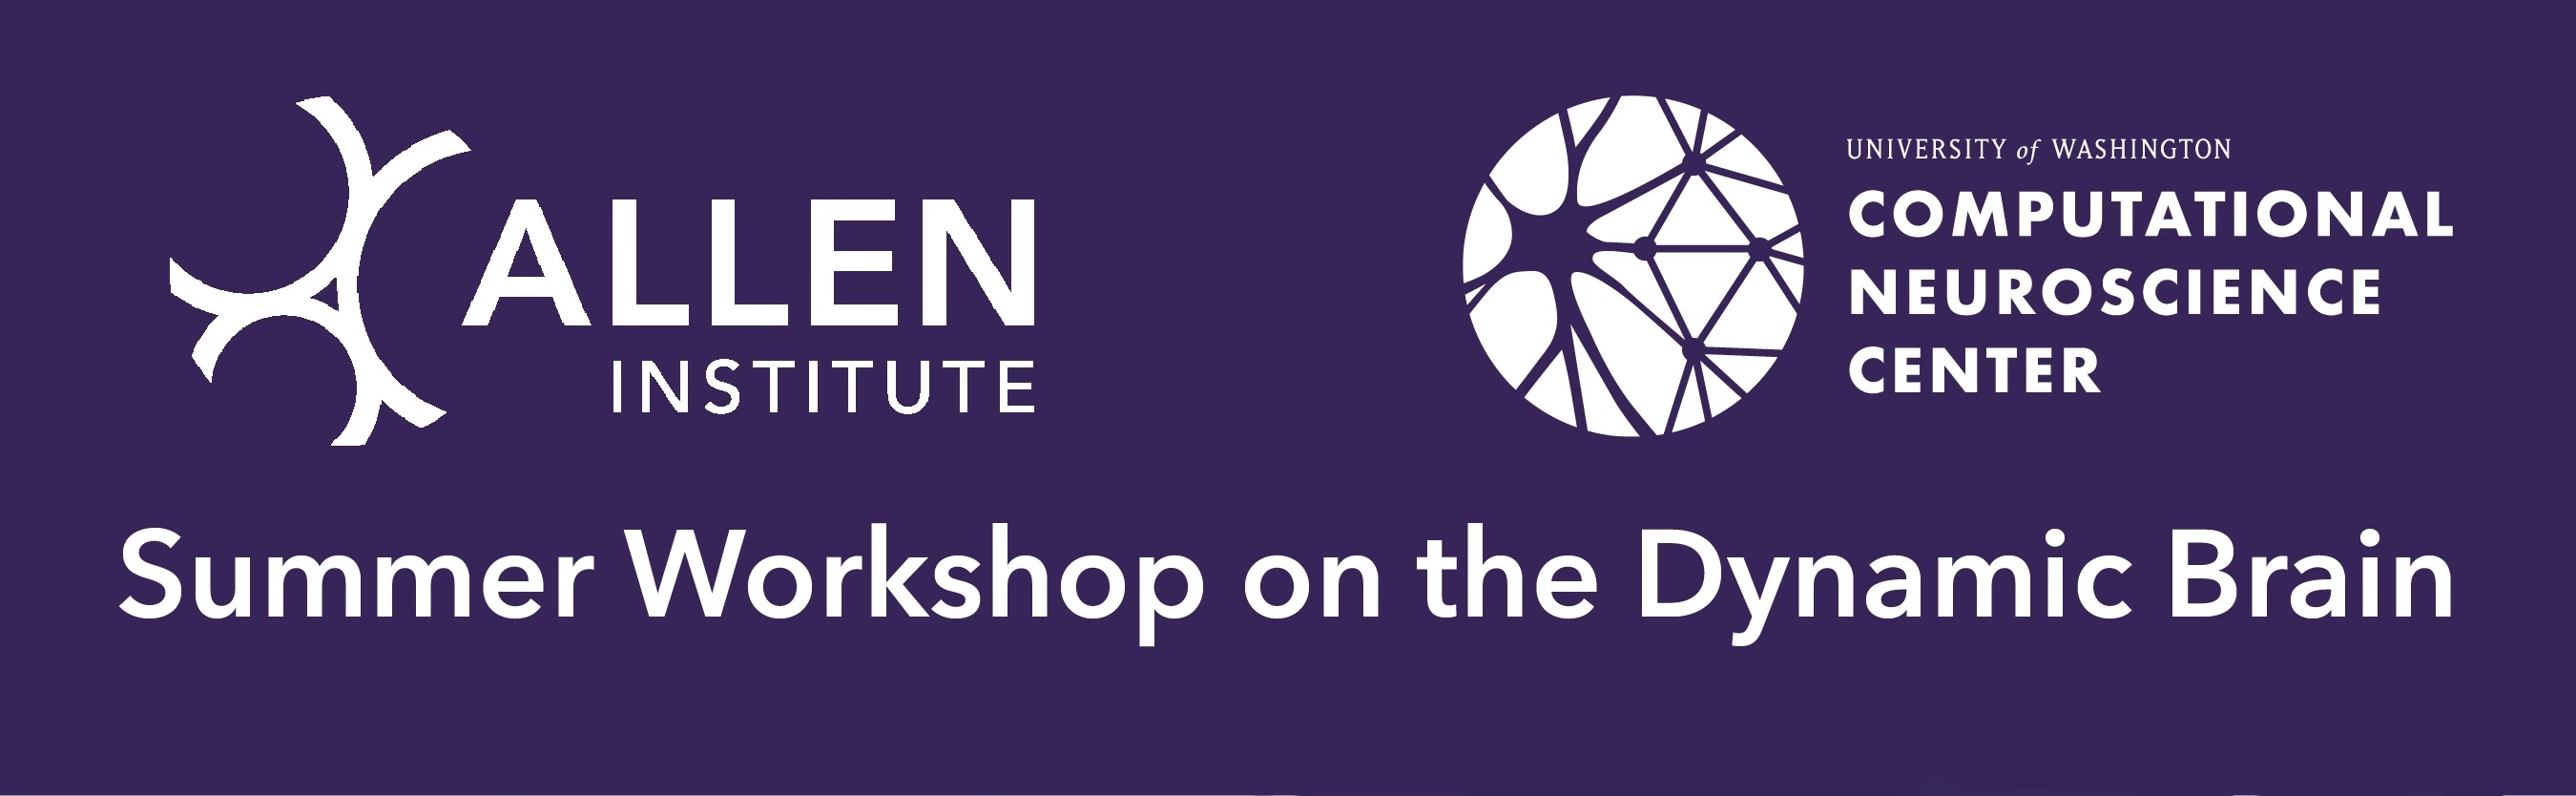

<h1 align="center">DAY 1 Workshop 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to the SWDB Datasets (AllenSDK)</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Objectives</h2>

    
In this workshop, we will briefly introduce the datasets made available for SWDB, walking through how to load, find, and access the data and metadata. After working through the material, you will learn: 
* how to use AllenSDK and pynwb to load and access data stored in Neurodata Without Borders (NWB) files
* how to use the metadata and the SWDB Data Book to find more information about the datasets 


<h3>Data Access: AllenSDK and pynwb</h3>
    
The SWDB datasets are packaged as NWB files, a standardized data format for neurophysiology data. We'll show you 2 Python toolkits for accessing NWB files: PyNWB and AllenSDK. PyNWB is the official API for NWB files while the AllenSDK is a Python package developed for accessing Allen Brain Atlas data (including the Brain Observatory datasets). This workshop is split into 2 Code Ocean capsules with the corresponding environment setup and attached datasets for each toolkit. You can use these capsules as templates for your own work, depending on the dataset you choose to work with. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3>AllenSDK</h3>

This capsule is focused on how to use the AllenSDK to programmatically access data and metadata from the Visual Coding and Visual Behavior projects. We'll explicitly show the data access patterns to load and plot data from one project, Visual Behavior Ophys, but many of the tools are generalizable. For more details on AllenSDK, refer to the [documentation](https://allensdk.readthedocs.io/en/latest/).  
    

<h3>Allen Brain Observatory Datasets </h3> 
    
The Allen Brain Observatory encompasses 4 projects that survey visual responses across multiple cortical areas and layers using optical physiology (two-photon calcium imaging) or extracellular electrophysiology (Neuropixels) recordings. Broadly, these datasets are used to investigate how sensory information is processed in the mouse visual cortex. 

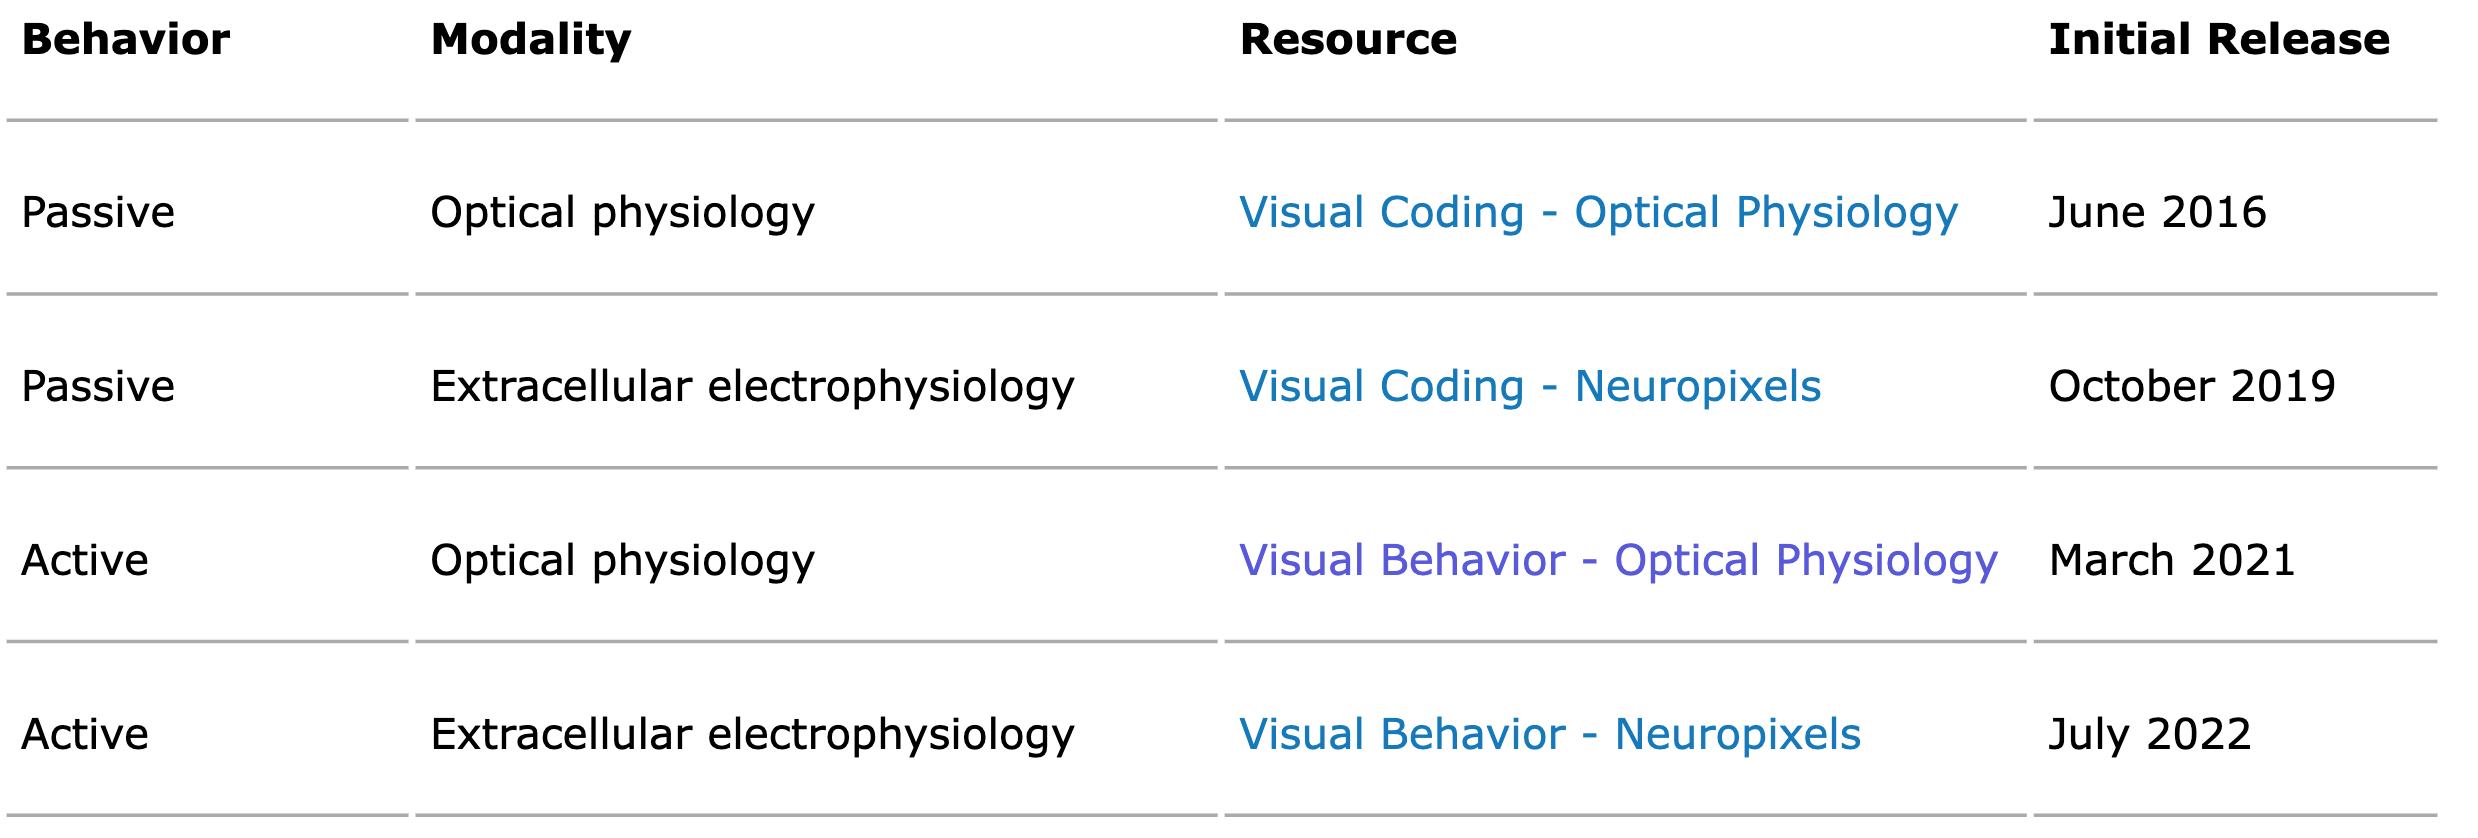


<h2>Visual Behavior 2p (Ophys)</h2>
    
In this tutorial, we'll show how to use the AllenSDK to access the data and metadata for the Visual Behavior Ophys project, in which in vivo 2-photon calcium imaging was used to measure the activity of inhibitory and excitatory neurons in visual cortex while mice performed a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations.

<h3>Change Detection Task</h3>
    
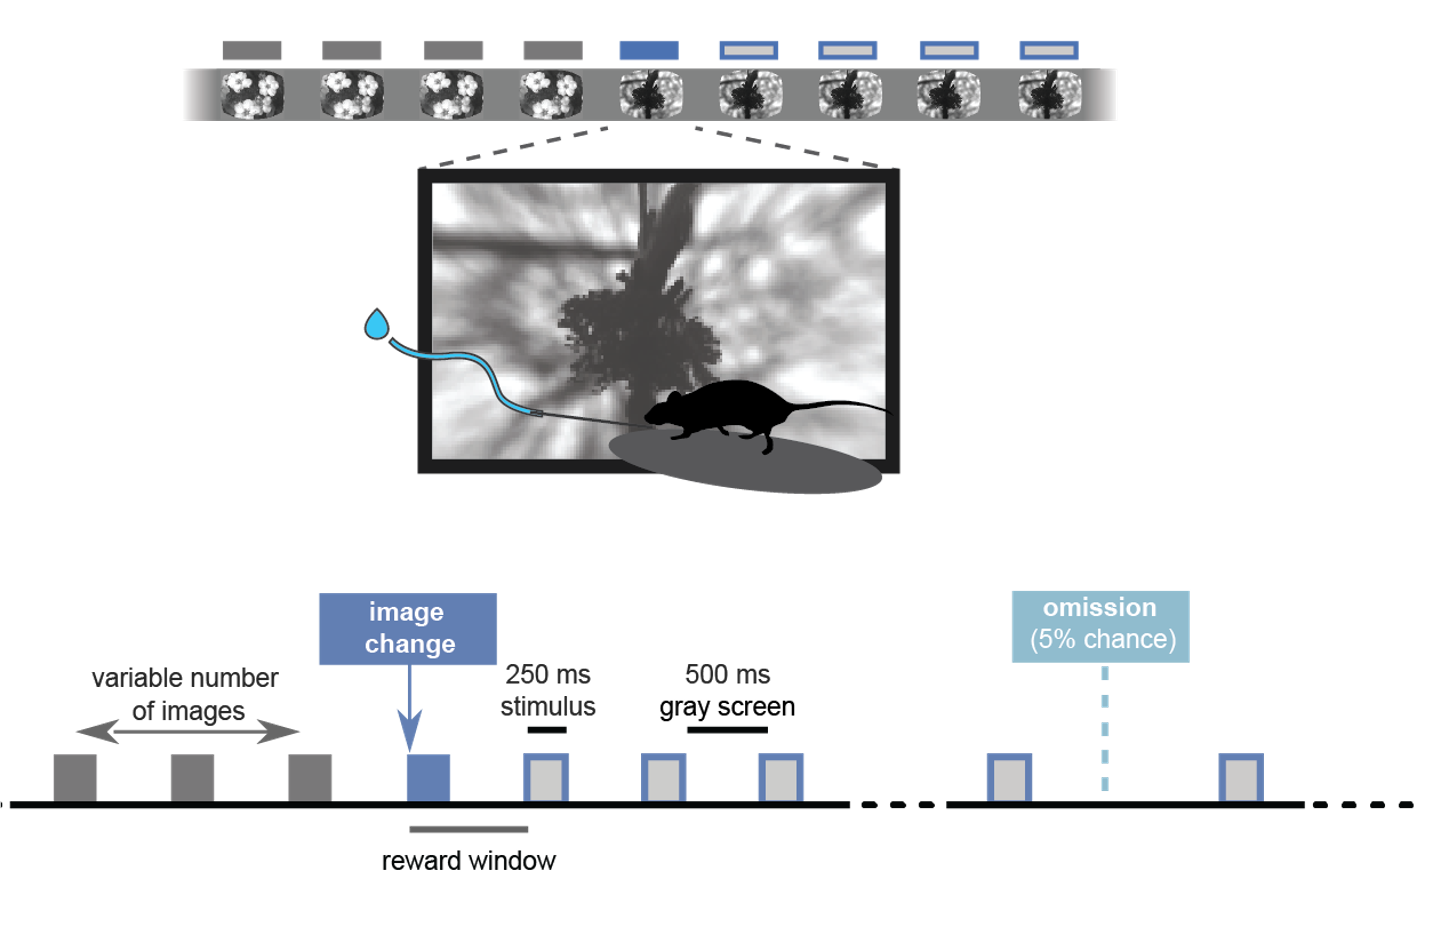


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Summer Workshop on the Dynamic Brain Data Book </h2> 

The databook is a resource for understanding the various dimensions of the datasets, the methods used, and how to access the data. You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Using AllenSDK to load the data </h2> 
Using the Python objects we'll show you below, you can extract information about this dataset such as which genetically defined cell populations were imaged, which session types are available, and how to find the same neurons across multiple sessions. 

The available data for each session includes: 
- Calcium fluorescence traces and deconvolved events representing neural activity
- Average projection images of 2-photon movies to visualize spatial organization of recorded neurons
- Stimulus presentation times, including times of image changes and image omissions
- Running speed and pupil area as measures of arousal and behavioral state
- Licking responses and reward times associated with task performance

</div>

In [1]:
# general imports 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np 
import pandas as pd 
%matplotlib inline 

import allensdk

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the Project Cache</h2> 
    
The code below shows how to use the VisualBehaviorOphysProjectCache class to load metadata tables and explore the features of the dataset. 

In [2]:
# import behavior project cache class to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = '/root/capsule/data/'

cache = VisualBehaviorOphysProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.9/site-packages/allensdk/api/cloud_cache/cloud_cache.py:439: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

NaturalMovieOneCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/root/capsule/data/resources/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
/opt/conda/lib/python3.9/

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Accessing the Project Metadata</h2>
Instatiating the cache downloads the 4 project metadata files, which are CSVs with summarized information about the behavior, recording sessions, and experiments. 
    
Project Metadata Files: 
1. ophys_experiment_table.csv
2. ophys_cells_table.csv 
3. behavior_session_table.csv 
4. ophys_session_table.csv 
    
Each CSV contains information related to its file name. See the schematic below for information about sessions vs experiments vs containers. These distinctions will be important for parsing the metadata. 

<h2>Sessions (Behavior and Ophys) vs Experiments </h2>  
    
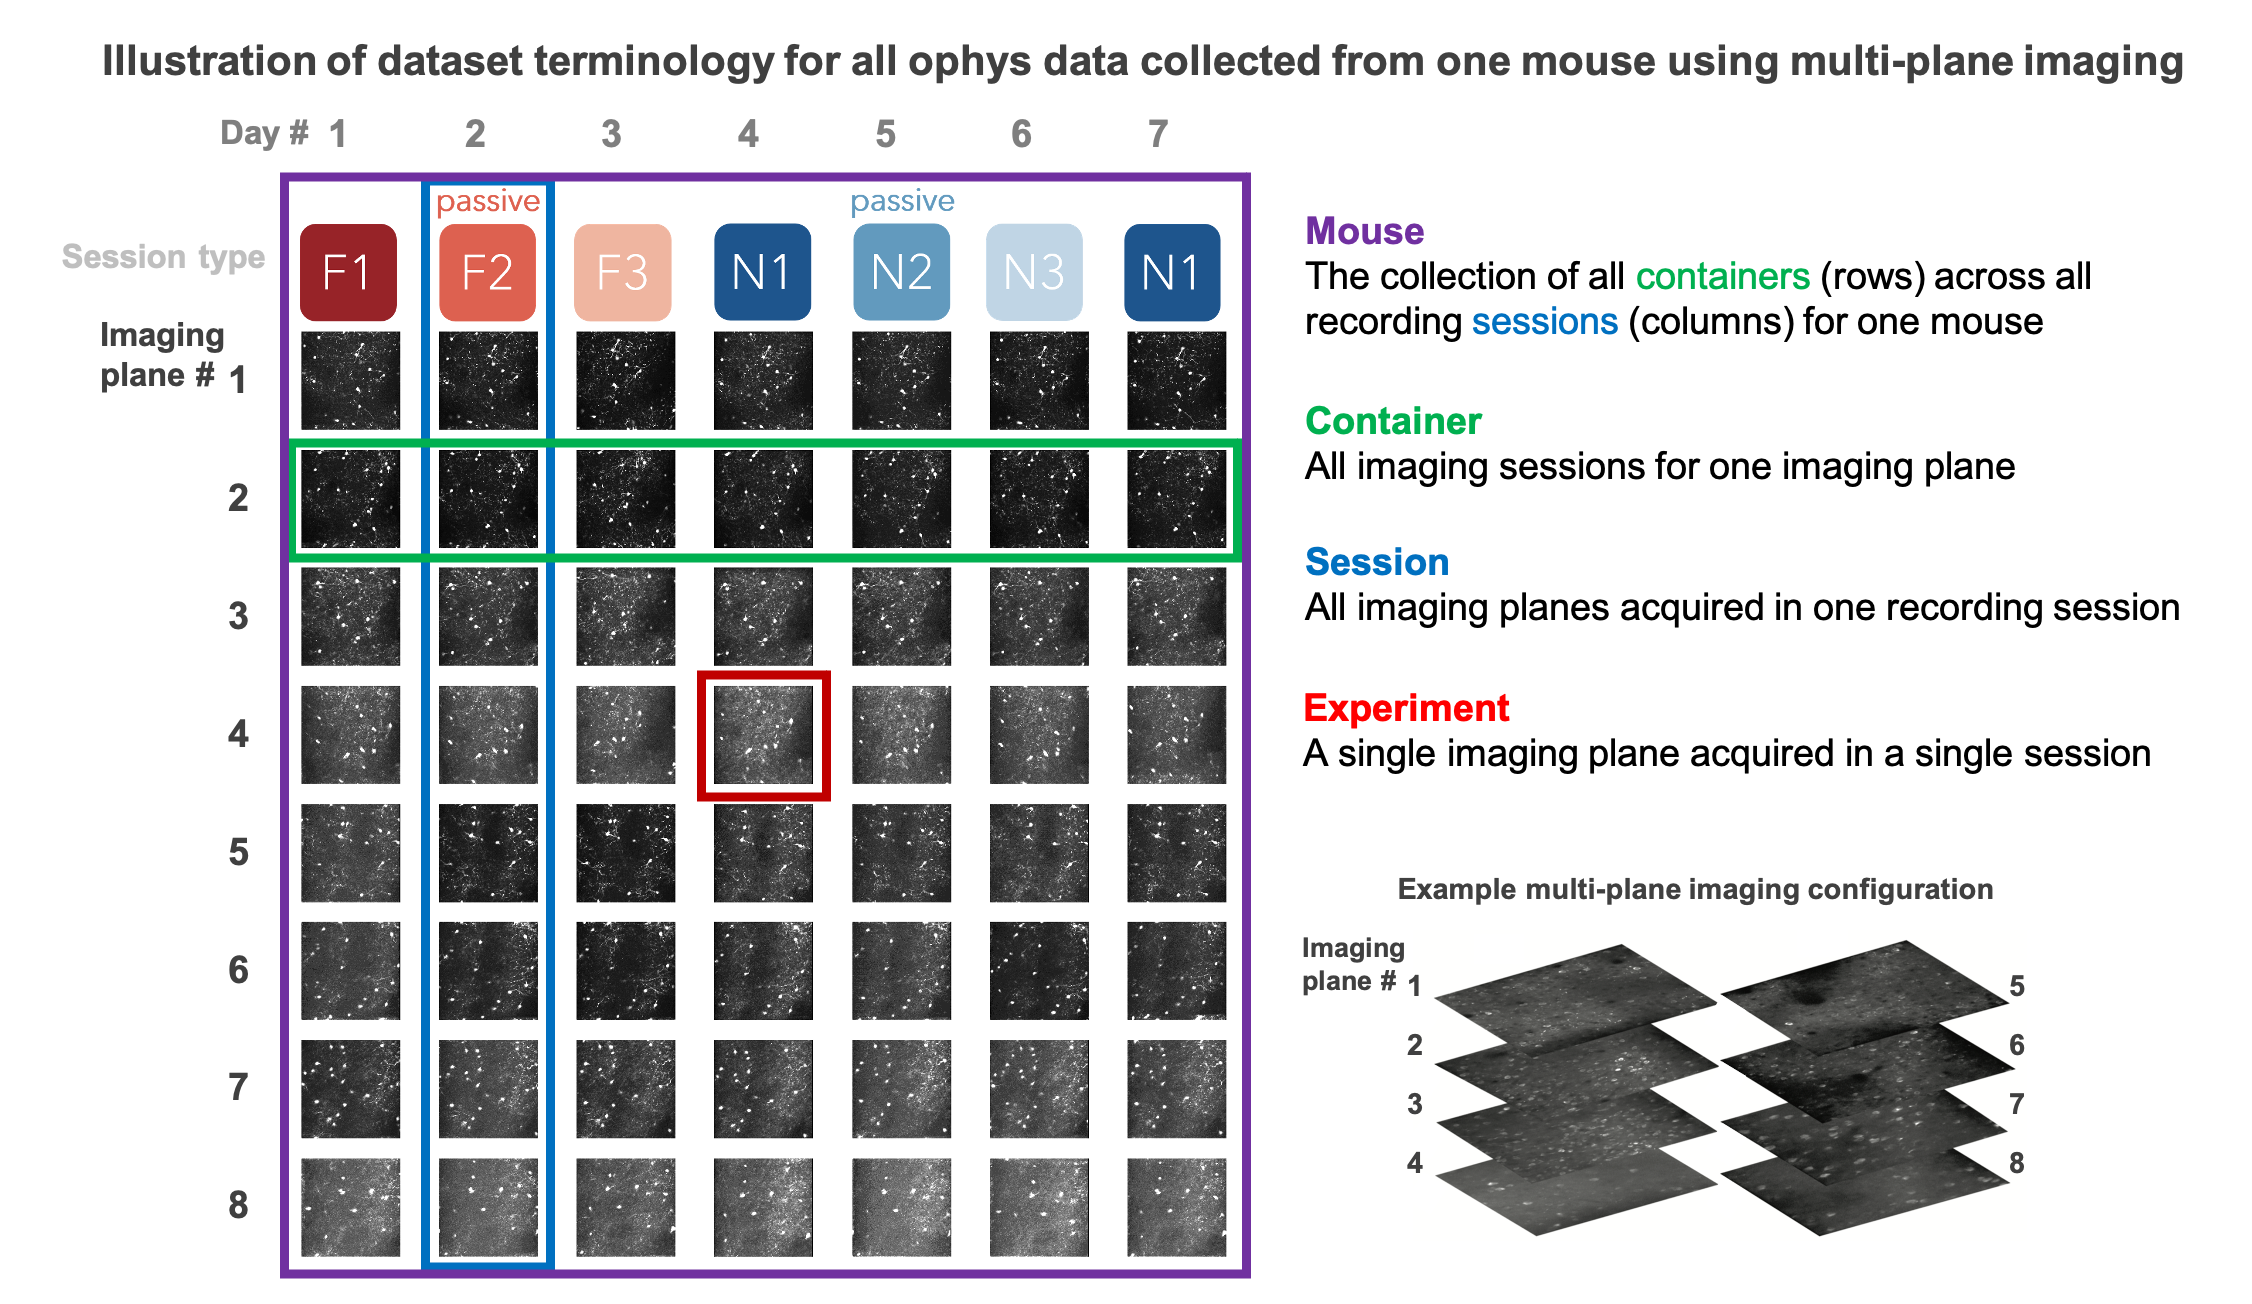


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the ophys experiment table</h2>

The AllenSDK has specific accessor methods to load the CSVs and return a pandas DataFrame with a row for each item and column for each metadata metric. 
    
Let's load the ophys_experiment_table.csv using the `get_ophys_experiment_table` method.  


In [38]:
ophys_experiment_table = cache.get_ophys_experiment_table() 
ophys_experiment_table.head()

behavior_session_id  ophys_session_id  \
ophys_experiment_id                                          
951980471                      951520319         951410079   
951980473                      951520319         951410079   
951980475                      951520319         951410079   
951980479                      951520319         951410079   
951980481                      951520319         951410079   

                     ophys_container_id mouse_id indicator  \
ophys_experiment_id                                          
951980471                    1018028342   457841   GCaMP6f   
951980473                    1018028345   457841   GCaMP6f   
951980475                    1018028339   457841   GCaMP6f   
951980479                    1018028354   457841   GCaMP6f   
951980481                    1018028357   457841   GCaMP6f   

                                                     full_genotype  \
ophys_experiment_id                                                  
951980471            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980473            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980475            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980479            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980481            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                        driver_line      cre_line               reporter_line  \
ophys_experiment_id                                                             
951980471            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980473            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980475            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980479            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980481            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   

                    sex  ...  passive  experience_level  \
ophys_experiment_id      ...                              
951980471             F  ...    False          Familiar   
951980473             F  ...    False          Familiar   
951980475             F  ...    False          Familiar   
951980479             F  ...    False          Familiar   
951980481             F  ...    False          Familiar   

                    prior_exposures_to_session_type  \
ophys_experiment_id                                   
951980471                                         0   
951980473                                         0   
951980475                                         0   
951980479                                         0   
951980481                                         0   

                     prior_exposures_to_image_set  \
ophys_experiment_id                                 
951980471                                      65   
951980473                                      65   
951980475                                      65   
951980479                                      65   
951980481                                      65   

                     prior_exposures_to_omissions  \
ophys_experiment_id                                 
951980471                                       0   
951980473                                       0   
951980475                                       0   
951980479                                       0   
951980481                                       0   

                                 date_of_acquisition equipment_name  \
ophys_experiment_id                                                   
951980471           2019-09-20 09:59:38.837000+00:00         MESO.1   
951980473           2019-09-20 09:59:38.837000+00:00         MESO.1   
951980475           2019-09-20 09:59:38.837000+00:00         MESO.1   
951980479           2019-09-20 09:59:38.837000+00:00         MESO.1   
951980481           2019-09-20 09:59:38.837000+00:00         MESO.1   

                     published_at isi_experiment_i

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Note that each row has a unique ophys experiment id, which represents a single experiment or imaging plane in a single recording session. The first 4 columns contain other numerical ids that we can use to relate this experiment with the behavior session, the ophys session, the ophys container, and the mouse. Looking at the list of column names, we can see that this table contains aggregated information about all of these aspects of the data: behavior, mouse, and imaging session.  

In [39]:
ophys_experiment_table.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Cells Table</h2>  

The same population of neurons were targeted across multiple recording sessions, allowing us to track the activity of single neurons across days. The imaging planes across sessions were registered so that we could identify the same neuron across recording sessions. Each neuron in a session was given a number_id: cell_roi_id. If that neuron was tracked across a container (multiple imaging sessions), then that neuron was given a cell_specimen_id. 
    
These IDs are stored in the ophys_cells table, which is accessible using the `get_ophys_cells_table()` method.


In [40]:
ophys_cell_table = cache.get_ophys_cells_table()
ophys_cell_table

ophys_experiment_id  cell_specimen_id
cell_roi_id                                       
1080884343             775614751        1086496928
1080884173             775614751        1086496914
1080883843             775614751        1086496838
1080886674             775614751        1086491756
1080885658             775614751        1086491699
...                          ...               ...
1115385589            1110928073        1120127229
1115385513            1110928073        1120127083
1115301580            1110928075        1120126794
1115301595            1110928075        1120126500
1115301537            1110928075        1120126373

[133066 rows x 2 columns]

In [41]:
# Let's merge the ophys cells table and experiments table
ophys_cell_table = ophys_cell_table.merge(ophys_experiment_table, on='ophys_experiment_id')

# Now we have experiments and cells together
ophys_cell_table.columns

Index(['ophys_experiment_id', 'cell_specimen_id', 'behavior_session_id',
       'ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_depth', 'targeted_structure',
       'targeted_imaging_depth', 'imaging_plane_group', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'passive', 'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'published_at',
       'isi_experiment_id', 'file_id'],
      dtype='object')

In [42]:
# Note that each row now represents each session ROI instead of experiment
print(f"Length ophys_cells: {len(ophys_cell_table)}") 

print(f"Length ophys_experiments: {len(ophys_experiment_table)}") 


Length ophys_cells: 133066
Length ophys_experiments: 1936


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Visual Behavior Ophys Projects</h2>  

The Visual Behavior Ophys project contains several dataset variants which used different imaging configurations and stimulus sets. The project metadata files aggregate data across the projects, identifiable using the `project_code` column in the DataFrame. 
    
Look at the unique project names in the `project_code` column of the ophys experiments table. 

In [43]:
ophys_cell_table.project_code.unique()

array(['VisualBehavior', 'VisualBehaviorMultiscope',
       'VisualBehaviorTask1B', 'VisualBehaviorMultiscope4areasx2d'],
      dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Dataset Variants</h2>
    
The datasets vary by the number of imaging planes (single or multiple), the targeted structure, and the stimulus set. 
    
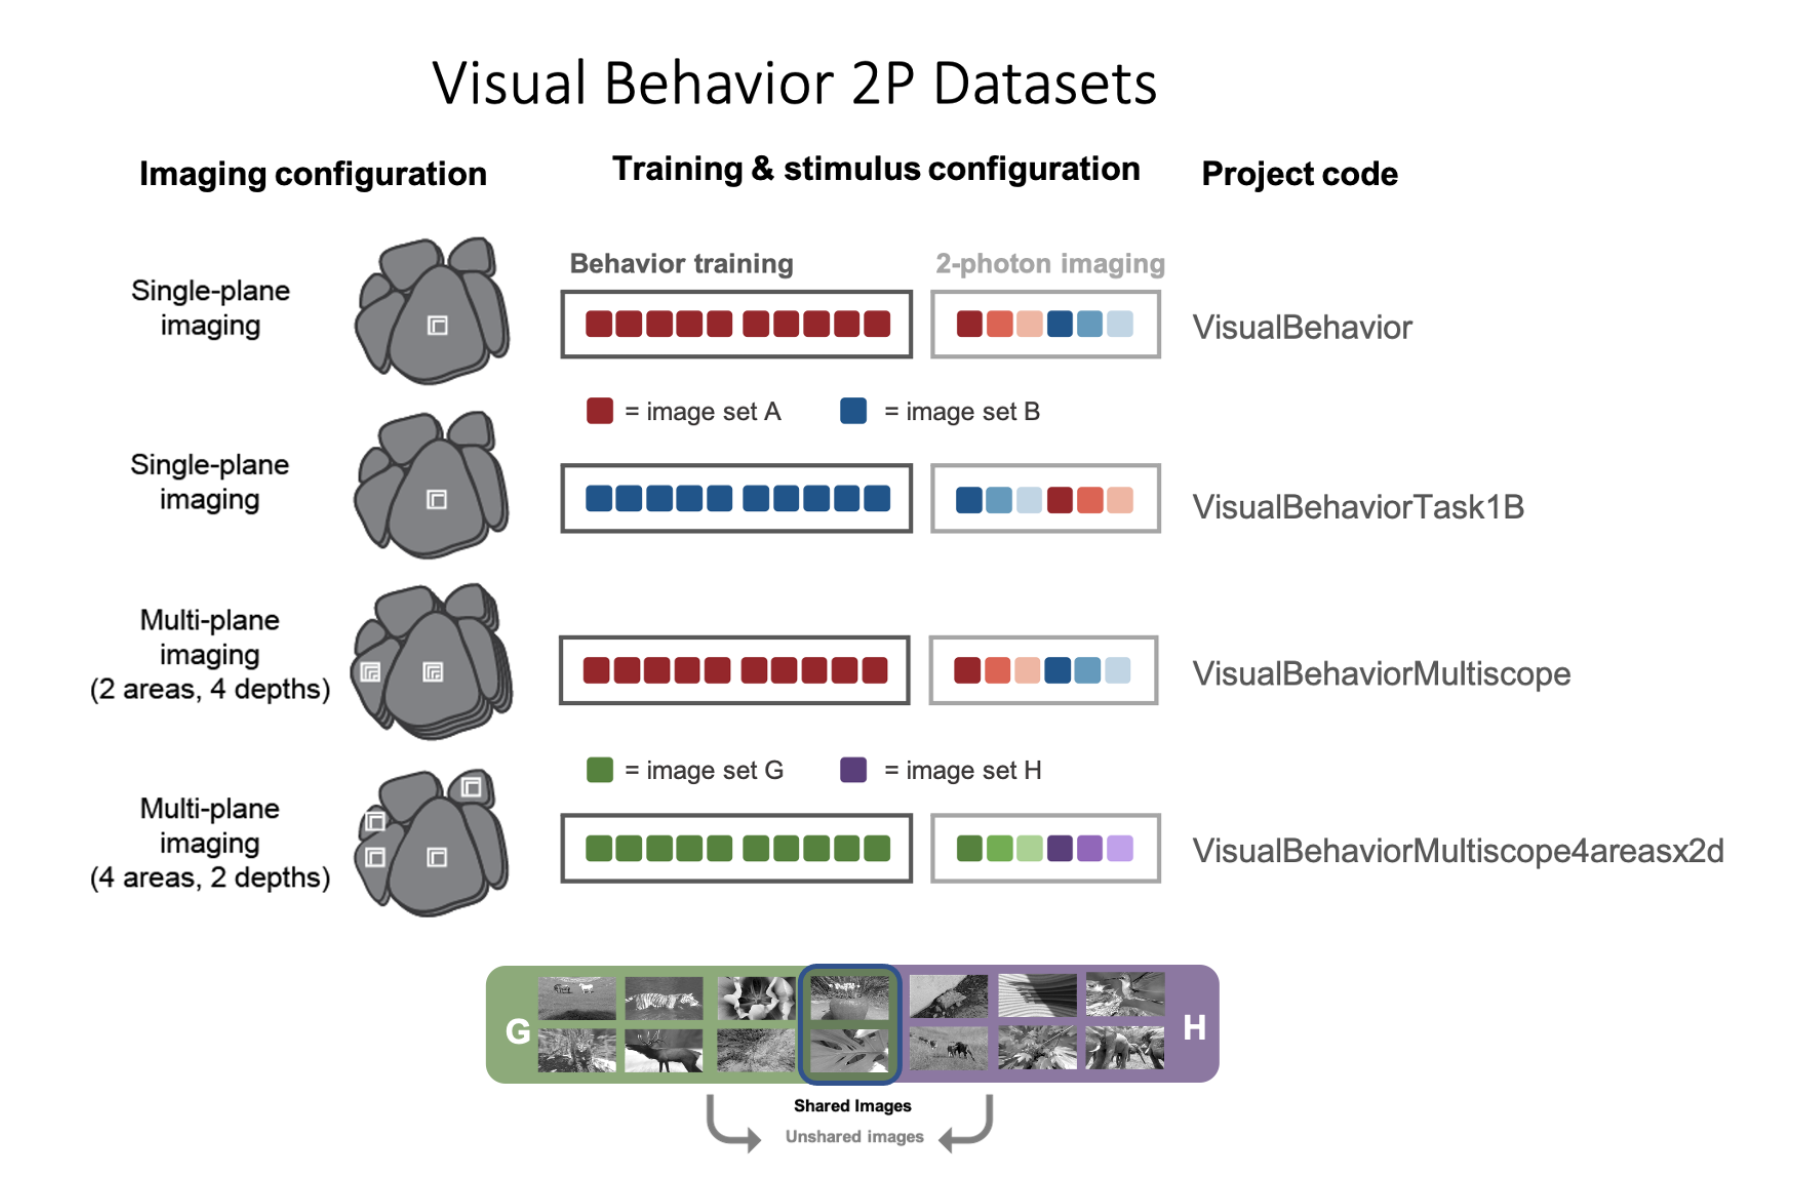
    
<br><br>
    
We can use the ophys_experiment table to identify differences across the dataset variances. For example, we can compare the `targeted_structure` and the `image_set` columns to tell us what brain regions were recorded from and what sets of images were presented to the mouse. 


In [44]:
# Compare the targeted structure between two dataset variants 

print(f"Visual Behavior: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].targeted_structure.unique()}")
print(f"Visual Behavior Task1B: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorTask1B'].targeted_structure.unique()}")
print(f"Visual Behavior Multiscope: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].targeted_structure.unique()}")
print(f"Visual Behavior Multiscope 4areasx2d: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope4areasx2d'].targeted_structure.unique()}")

Visual Behavior: ['VISp']
Visual Behavior Task1B: ['VISp']
Visual Behavior Multiscope: ['VISp' 'VISl']
Visual Behavior Multiscope 4areasx2d: ['VISp' 'VISl' 'VISal' 'VISam']


In [90]:
# Compare the image set between two dataset variants 

print(f"Visual Behavior: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].image_set.unique()}")
print(f"Visual Behavior Task1B: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorTask1B'].image_set.unique()}")
print(f"Visual Behavior Multiscope: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].image_set.unique()}")
print(f"Visual Behavior Multiscope 4areasx2d: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope4areasx2d'].image_set.unique()}")

Visual Behavior: ['A' 'B']
Visual Behavior Task1B: ['B' 'A']
Visual Behavior Multiscope: ['A' 'B']
Visual Behavior Multiscope 4areasx2d: ['G' 'H']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Single plane vs multi-plane</h2> 

To distinguish single plane from multi-plane projects, we need to see how many experiments (imaging planes) are in a session. 

In [127]:
# Select a session id from a single plane and a multi plane dataset 
single_plane_session = ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].ophys_session_id.iloc[0]
multi_plane_session = ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].ophys_session_id.iloc[0]

# Count how many experiments are in a session (ie how many imaging planes in a recording session) 

print(f"Num experiments in single plane: {len(ophys_cell_table[ophys_cell_table.ophys_session_id == single_plane_session].ophys_experiment_id.unique())}")

print(f"Num experiments in multi plane: {len(ophys_cell_table[ophys_cell_table.ophys_session_id == multi_plane_session].ophys_experiment_id.unique())}")

Num experiments in single plane: 1
Num experiments in multi plane: 6


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Find dataset features</h2>
    
From this point, let's focus on the **Visual Behavior** project. Using the metadata, let's explore different features of the dataset. 

In [48]:
# Filter DataFrames for Visual Behavior project 

project = 'VisualBehavior' 
filtered_ophys_cell_table = ophys_cell_table[ophys_cell_table.project_code == project] 
filtered_ophys_cell_table.head()

ophys_experiment_id  cell_specimen_id  behavior_session_id  \
0            775614751        1086496928            775378326   
1            775614751        1086496914            775378326   
2            775614751        1086496838            775378326   
3            775614751        1086491756            775378326   
4            775614751        1086491699            775378326   

   ophys_session_id  ophys_container_id mouse_id indicator  \
0         775289198           782536745   403491   GCaMP6f   
1         775289198           782536745   403491   GCaMP6f   
2         775289198           782536745   403491   GCaMP6f   
3         775289198           782536745   403491   GCaMP6f   
4         775289198           782536745   403491   GCaMP6f   

                                       full_genotype  \
0  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
2  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
3  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
4  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   

                       driver_line           cre_line  ... passive  \
0  [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre  ...   False   
1  [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre  ...   False   
2  [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre  ...   False   
3  [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre  ...   False   
4  [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre  ...   False   

  experience_level  prior_exposures_to_session_type  \
0         Familiar                                1   
1         Familiar                                1   
2         Familiar                                1   
3         Familiar                                1   
4         Familiar                                1   

   prior_exposures_to_image_set prior_exposures_to_omissions  \
0                            44                            5   
1                            44                            5   
2                            44                            5   
3                            44                            5   
4                            44                            5   

               date_of_acquisition  equipment_name published_at  \
0 2018-11-08 11:22:06.936000+00:00         CAM2P.5   2021-03-25   
1 2018-11-08 11:22:06.936000+00:00         CAM2P.5   2021-03-25   
2 2018-11-08 11:22:06.936000+00:00         CAM2P.5   2021-03-25   
3 2018-11-08 11:22:06.936000+00:00         CAM2P.5   2021-03-25   
4 2018-11-08 11:22:06.936000+00:00         CAM2P.5   2021-03-25   

  isi_experiment_id  file_id  
0         730814230     1905  
1         730814230     1905  
2         730814230     1905  
3         730814230     1905  
4         730814230     1905  

[5 rows x 32 columns]

In [49]:
filtered_ophys_cell_table.columns

Index(['ophys_experiment_id', 'cell_specimen_id', 'behavior_session_id',
       'ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_depth', 'targeted_structure',
       'targeted_imaging_depth', 'imaging_plane_group', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'passive', 'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'published_at',
       'isi_experiment_id', 'file_id'],
      dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many mice were used in this dataset?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many sessions? 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What transgenic lines were used in this dataset? What cell types do these lines refer to? 
    
For help, refer to the list of [transgenic lines](https://allenswdb.github.io/background/transgenic-tools.html) in the Data Book 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
**Exercise:** What structures were targeted? 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many unique cells were recorded in this dataset? 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Sessions and Behavior Sessions Tables</h2>  

We won't go into detail on the other project metadata files as the information in these tables greatly overlaps with the ophys experiments table. The ophys sessions table contains the same information as the ophys experiment table, but is organized by session instead of experiment. The behavior sessions table contains behavior data for training only and imaging sessions. Refer to the [Visual Behavior Ophys Dataset](https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html) page of the Data Book. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Select an experiment and load the data</h2>       

Now that we've learned a bit about the dataset features, let's load the data for an experiment of interest. 

We can use the `get_ophys_experiment()` method to return a python object containing all the data and metadata for an experiment using the `ophys_experiment_id`. We can select an experiment of interest by filtering the `ophys_experiments` table based on specific experimental conditions. 

Let's look at the neural activity from Somatostatin neurons, an inhibitory cell type, and focus on sessions in which novel images were shown. We need to filter by: **driver line** (Sst-IRES-Cre) and **prior_exposures_to_image_set** (0, indicating this is a novel presentation) 
    

In [53]:
selected_cell_table = filtered_ophys_cell_table[(filtered_ophys_cell_table.cre_line=='Sst-IRES-Cre') &
                        (filtered_ophys_cell_table.prior_exposures_to_image_set==0)]

print('Number of experiments: {}'.format(len(selected_cell_table.ophys_experiment_id.unique())))
selected_cell_table.head()

Number of experiments: 6


ophys_experiment_id  cell_specimen_id  behavior_session_id  \
66778            965228792        1086490890            965034185   
66779            965228792        1086490791            965034185   
66780            965228792        1086490726            965034185   
66781            965228792        1086490690            965034185   
66782            965228792        1086490662            965034185   

       ophys_session_id  ophys_container_id mouse_id indicator  \
66778         964912357           957024596   467302   GCaMP6f   
66779         964912357           957024596   467302   GCaMP6f   
66780         964912357           957024596   467302   GCaMP6f   
66781         964912357           957024596   467302   GCaMP6f   
66782         964912357           957024596   467302   GCaMP6f   

                                       full_genotype     driver_line  \
66778  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  [Sst-IRES-Cre]   
66779  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  [Sst-IRES-Cre]   
66780  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  [Sst-IRES-Cre]   
66781  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  [Sst-IRES-Cre]   
66782  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  [Sst-IRES-Cre]   

           cre_line  ... passive experience_level  \
66778  Sst-IRES-Cre  ...   False          Novel 1   
66779  Sst-IRES-Cre  ...   False          Novel 1   
66780  Sst-IRES-Cre  ...   False          Novel 1   
66781  Sst-IRES-Cre  ...   False          Novel 1   
66782  Sst-IRES-Cre  ...   False          Novel 1   

       prior_exposures_to_session_type  prior_exposures_to_image_set  \
66778                                0                             0   
66779                                0                             0   
66780                                0                             0   
66781                                0                             0   
66782                                0                             0   

      prior_exposures_to_omissions              date_of_acquisition  \
66778                            6 2019-10-10 11:40:43.640000+00:00   
66779                            6 2019-10-10 11:40:43.640000+00:00   
66780                            6 2019-10-10 11:40:43.640000+00:00   
66781                            6 2019-10-10 11:40:43.640000+00:00   
66782                            6 2019-10-10 11:40:43.640000+00:00   

       equipment_name published_at isi_experiment_id  file_id  
66778         CAM2P.5   2021-03-25         894191516     1876  
66779         CAM2P.5   2021-03-25         894191516     1876  
66780         CAM2P.5   2021-03-25         894191516     1876  
66781         CAM2P.5   2021-03-25         894191516     1876  
66782         CAM2P.5   2021-03-25         894191516     1876  

[5 rows x 32 columns]

In [54]:
# select an experiment id from the table 
ophys_experiment_id = 965228792

# load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Inspect the experiment object attributes</h4>
Using the `list_data_attributes_and_methods()` method will show us all of the attributes of the `ophys_experiment` object. 

In [55]:
ophys_experiment.list_data_attributes_and_methods()

['average_projection',
 'behavior_session_id',
 'cell_specimen_table',
 'corrected_fluorescence_traces',
 'demixed_traces',
 'dff_traces',
 'events',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_cell_specimen_ids',
 'get_cell_specimen_indices',
 'get_dff_traces',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'get_segmentation_mask_image',
 'licks',
 'max_projection',
 'metadata',
 'motion_correction',
 'neuropil_traces',
 'ophys_experiment_id',
 'ophys_session_id',
 'ophys_timestamps',
 'raw_running_speed',
 'rewards',
 'roi_masks',
 'running_speed',
 'segmentation_mask_image',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials',
 'update_targeted_imaging_depth']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Experiment Metadata</h4>
 
The metadata attribute will output metadata for this specific experiment. 

In [56]:
ophys_experiment.metadata

{'equipment_name': 'CAM2P.5',
 'sex': 'M',
 'age_in_days': 180,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': datetime.datetime(2019, 10, 10, 11, 40, 43, 640000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('37d1fac7-e99b-4d04-86a3-fb5ed62c40ac'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '467302',
 'project_code': 'VisualBehavior',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 965034185,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 957024596,
 'field_of_view_height': 512,
 'field_of_view_width': 447,
 'imaging_depth': 290,
 'targeted_imaging_depth': 290,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 965228792,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 964912357,
 'targeted_structure': 'VISp'}

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What is the ophys sampling rate? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Segmented ROIs</h4>
    
ROIs of the neuron cell bodies are segmented from the 2-photon movies and represented as segmentation masks. Let's compare the max projection image of the 2-photon movie with the automatically segmented masks to assess the segmentation quality. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

How many cells do you see in the max projection? How does it compare to the segmented ROI masks? 

Text(0.5, 0, 'X')

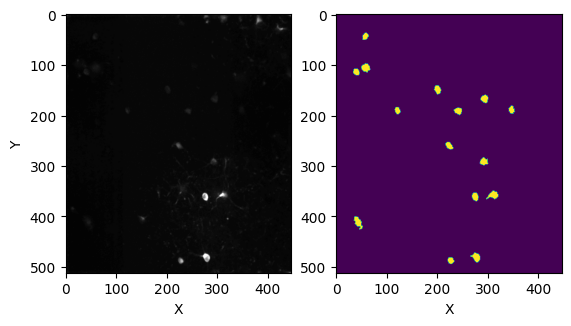

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ophys_experiment.max_projection, cmap='gray')
ax1.set_xlabel('X') 
ax1.set_ylabel('Y')
ax2.imshow(ophys_experiment.segmentation_mask_image)
ax2.set_xlabel('X')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can access the segmented ROI mask data through the `cell_specimen_table`, which contains metadata about each ROI mask and the masks themselves, a sparse HxW boolean array. 

In [59]:
ophys_experiment.cell_specimen_table.head()

cell_roi_id  height  mask_image_plane  max_correction_down  \
cell_specimen_id                                                               
1086490183         1080745054      13                 0                 26.0   
1086490259         1080745061      26                 0                 26.0   
1086490217         1080745075      20                 0                 26.0   
1086490289         1080745102      17                 0                 26.0   
1086490100         1080745141      16                 0                 26.0   

                  max_correction_left  max_correction_right  \
cell_specimen_id                                              
1086490183                       19.0                  15.0   
1086490259                       19.0                  15.0   
1086490217                       19.0                  15.0   
1086490289                       19.0                  15.0   
1086490100                       19.0                  15.0   

                  max_correction_up  valid_roi  width    x    y  \
cell_specimen_id                                                  
1086490183                     16.0       True     13  221  481   
1086490259                     16.0       True     18   35  400   
1086490217                     16.0       True     19  266  471   
1086490289                     16.0       True     24  297  349   
1086490100                     16.0       True     17  284  283   

                                                           roi_mask  
cell_specimen_id                                                     
1086490183        [[False, False, False, False, False, False, Fa...  
1086490259        [[False, False, False, False, False, False, Fa...  
1086490217        [[False, False, False, False, False, False, Fa...  
1086490289        [[False, False, False, False, False, False, Fa...  
1086490100        [[False, False, False, False, False, False, Fa...

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Quality Control: Valid ROIs </h2>
    
Each ROI mask is passed through a QC filter that detects valid cells. Note that all the inputs in the `valid_roi` column of the `cell_specimen_table` are True. This dataset has been QC filtered and only valid ROIs are shared here. 

In [60]:
ophys_experiment.cell_specimen_table.valid_roi.unique()

array([ True])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Neural Activity Timeseries: DF/F</h2>
After ROIs are segmented, the average fluorescence value is calculated for each ROI then baseline subtracted and normalized to yield the change in fluorescence over fluorescence (df/f). These are the cell activity traces typically used for analysis.
    
`dff_traces` is organized by both cell_specimen_id and cell_roi_id.

In [61]:
# Get fluorescence traces 

dff_traces = ophys_experiment.dff_traces
dff_traces.head()

cell_roi_id  \
cell_specimen_id                
1086490183         1080745054   
1086490259         1080745061   
1086490217         1080745075   
1086490289         1080745102   
1086490100         1080745141   

                                                                dff  
cell_specimen_id                                                     
1086490183        [0.4724213182926178, 0.6096717715263367, 0.437...  
1086490259        [0.09469164162874222, 0.04090513661503792, 0.0...  
1086490217        [0.26794859766960144, 0.07172279804944992, 0.1...  
1086490289        [0.225271075963974, 0.35283395648002625, 0.365...  
1086490100        [0.4876894950866699, 0.05651107057929039, 0.11...

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h4>Events</h4>
    
Events are computed for each cell as described in [Giovannucci et al. 2019](https://pubmed.ncbi.nlm.nih.gov/30652683/). The magnitude of events approximates the firing rate of neurons with the resolution of ~200ms. The biggest advantage of using events over dff traces is they exclude prolonged calcium transients that may contaminate neural responses to subsequent stimuli. You can also use `filtered_events`, which are events convolved with a filter created using `stats.halfnorm` method to generate a more continuous trace of activity

In [62]:
# Get deconvolved events 
events = ophys_experiment.events 
events.head()

cell_roi_id  \
cell_specimen_id                
1086490183         1080745054   
1086490259         1080745061   
1086490217         1080745075   
1086490289         1080745102   
1086490100         1080745141   

                                                             events  \
cell_specimen_id                                                      
1086490183        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086490259        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086490217        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086490289        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086490100        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    filtered_events  lambda  \
cell_specimen_id                                                              
1086490183        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.2016   
1086490259        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0467   
1086490217        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0877   
1086490289        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.1282   
1086490100        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0994   

                  noise_std  
cell_specimen_id             
1086490183         0.114914  
1086490259         0.054990  
1086490217         0.075497  
1086490289         0.092054  
1086490100         0.081092

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Timestamps</h4>
The last piece of data we need to plot the neural activity traces are the timestamps, measured in seconds. 

In [63]:
# Get ophys timestamps 
ophys_timestamps = ophys_experiment.ophys_timestamps
ophys_timestamps 

array([2.94064000e+00, 2.97295000e+00, 3.00526000e+00, ...,
       4.53543615e+03, 4.53546846e+03, 4.53550077e+03])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How long is a session? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot Neural Activity Traces</h4>
    
Plot dff and events for one roi. For visualization purposes, we'll select a 40s time window to plot. 

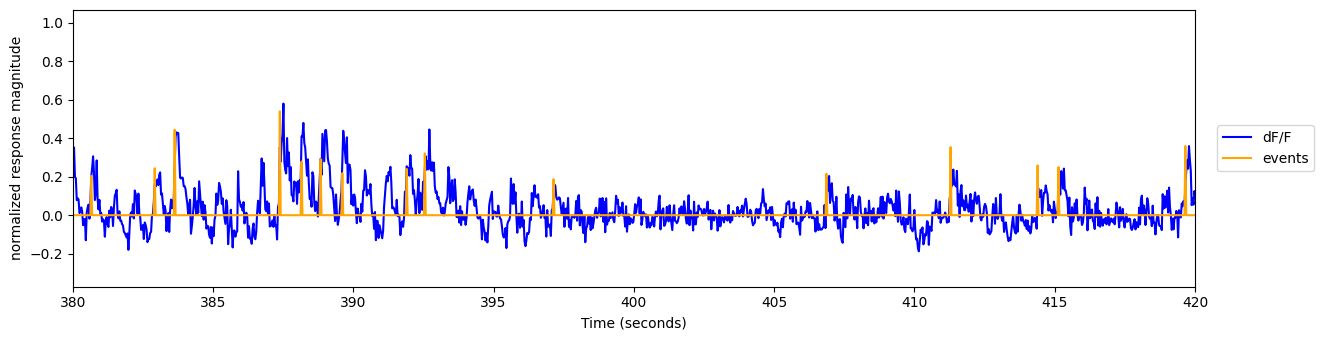

In [86]:
# Plot dF/F and events for one cell 
# Note that we normalize the continuous traces 
roi = 0
initial_time = 380
final_time = 420

fig, ax = plt.subplots(figsize=(15, 3.5))

# plot df/F - normalizing by max 
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
# plot events - normalizing by max 
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

ax.set_ylabel('normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity alongside stimuli</h4>

The stimulus presentations table contains one entry for each visual stimulus that was presented during the session, along with important metadata about the stimulus. 

In [66]:
stimulus_table = ophys_experiment.stimulus_presentations
stimulus_table.head()

stimulus_block        stimulus_block_name  \
stimulus_presentations_id                                              
0                                       0   initial_gray_screen_5min   
1                                       1  change_detection_behavior   
2                                       1  change_detection_behavior   
3                                       1  change_detection_behavior   
4                                       1  change_detection_behavior   

                           image_index image_name  movie_frame_index  \
stimulus_presentations_id                                              
0                                  -99        NaN                -99   
1                                    0      im000                -99   
2                                    0      im000                -99   
3                                    0      im000                -99   
4                                    0      im000                -99   

                             duration  start_time    end_time  start_frame  \
stimulus_presentations_id                                                    
0                          309.894326    0.000000  309.894326            0   
1                            0.250200  309.894326  310.144526        17986   
2                            0.250200  310.644936  310.895136        18031   
3                            0.250340  311.395546  311.645886        18076   
4                            0.250200  312.146156  312.396356        18121   

                           end_frame  is_change  is_image_novel  omitted  \
stimulus_presentations_id                                                  
0                              17986      False            <NA>     <NA>   
1                              18001      False            True    False   
2                              18046      False            True    False   
3                              18091      False            True    False   
4                              18136      False            True    False   

                           movie_repeat  flashes_since_change  trials_id  \
stimulus_presentations_id                                                  
0                                   -99                     0        -99   
1                                   -99                     1          0   
2                                   -99                     2          0   
3                                   -99                     3          1   
4                                   -99                     4          1   

                                                         stimulus_name  \
stimulus_presentations_id                                                
0                                                          spontaneous   
1                          Natural_Images_Lum_Matched_set_ophys_6_2017   
2                          Natural_Images_Lum_Matched_set_ophys_6_2017   
3                          Natural_Images_Lum_Matched_set_ophys_6_2017   
4                          Natural_Images_Lum_Matched_set_ophys_6_2017   

                           is_sham_change  active  
stimulus_presentations_id                          
0                                   False   False  
1                                   False    True  
2                                   False    True  
3                                   False    True  
4                                   False    True

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What are the unique stimulus blocks presented in this dataset? What are the unique stimuli? 

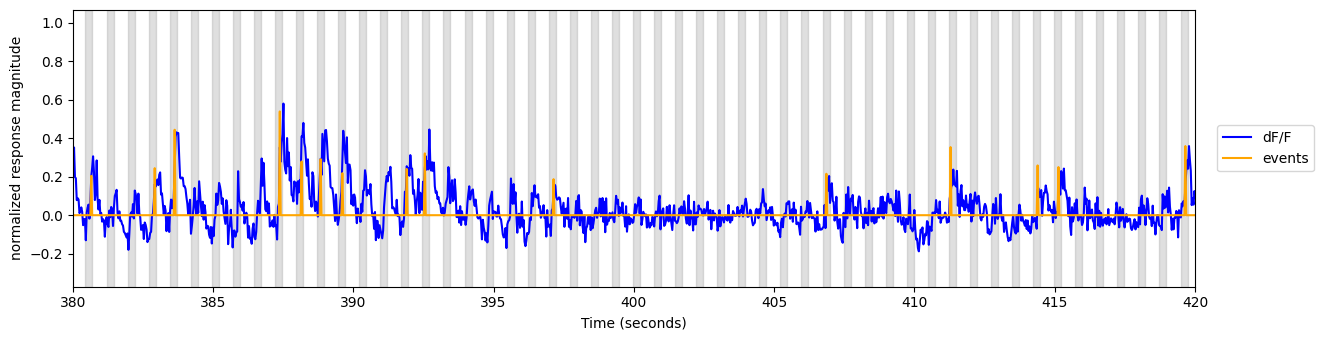

In [85]:
# Plot dF/F and events for one cell with stimulus presentations
roi = 0
initial_time = 380
final_time = 420

fig, ax = plt.subplots(figsize=(15, 3.5))

# plot df/F
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
# plot events
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# Add shaded regions for stimulus presentations 
for idx, stimulus in stimulus_table.iterrows():
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)

ax.set_ylabel('normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity with stimuli and behavior</h4>
    
There are 4 behavior modalities collected alongside the 2p images: licks, rewards, running speed, and eye tracking. 
Use `?` to find more information about each modality. 

In [69]:
?ophys_experiment.licks

Type:        property
String form: <property object at 0x7f49f71fb860>
Docstring:  
A dataframe containing lick timestmaps and frames, sampled
at 60 Hz.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
np.ndarray
    A dataframe containing lick timestamps.
    dataframe columns:
        timestamps: (float)
            time of lick, in seconds
        frame: (int)
            frame of lick

In [70]:
ophys_experiment.licks.head()

timestamps  frame
0     9.86314      0
1    10.08005     13
2    15.35055    329
3    17.83593    478
4    19.32047    567

In [71]:
?ophys_experiment.rewards

Type:        property
String form: <property object at 0x7f49f71fb810>
Docstring:  
Retrieves rewards from data file saved at the end of the
behavior session.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
pd.DataFrame
    A dataframe containing timestamps of delivered rewards.
    Timestamps are sampled at 60Hz.

    dataframe columns:
        volume: (float)
            volume of individual water reward in ml.
            0.007 if earned reward, 0.005 if auto reward.
        timestamps: (float)
            time in seconds
        auto_rewarded: (bool)
            True if free reward was delivered for that trial.
            Occurs during the first 5 trials of a session and
            throughout as needed

In [72]:
ophys_experiment.rewards.head()

volume  timestamps  auto_rewarded
0   0.005   316.02785           True
1   0.005   397.84436           True
2   0.005   491.67063           True
3   0.005   538.95909           True
4   0.005   559.24226           True

In [73]:
?ophys_experiment.running_speed

Type:        property
String form: <property object at 0x7f49f71fb8b0>
Docstring:  
Running speed and timestamps, sampled at 60Hz. By default
applies a 10Hz low pass filter to the data. To get the
running speed without the filter, use `raw_running_speed`.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
pd.DataFrame
    Dataframe containing running speed and timestamps
    dataframe columns:
        timestamps: (float)
            time in seconds
        speed: (float)
            speed in cm/sec

In [74]:
ophys_experiment.running_speed.head()

timestamps     speed
0     9.86314 -0.066349
1     9.87990  1.309886
2     9.89650  2.598647
3     9.91315  3.733095
4     9.92986  4.671478

In [75]:
?ophys_experiment.eye_tracking

Type:        property
String form: <property object at 0x7f49f71ed3b0>
Docstring:  
A dataframe containing ellipse fit parameters for the eye, pupil
and corneal reflection (cr). Fits are derived from tracking points
from a DeepLabCut model applied to video frames of a subject's
right eye. Raw tracking points and raw video frames are not exposed
by the SDK.

Notes:
- All columns starting with 'pupil_' represent ellipse fit parameters
  relating to the pupil.
- All columns starting with 'eye_' represent ellipse fit parameters
  relating to the eyelid.
- All columns starting with 'cr_' represent ellipse fit parameters
  relating to the corneal reflection, which is caused by an infrared
  LED positioned near the eye tracking camera.
- All positions are in units of pixels.
- All areas are in units of pixels^2
- All values are in the coordinate space of the eye tracking camera,
  NOT the coordinate space of the stimulus display (i.e. this is not
  gaze location), with (0, 0) being the upper-

In [76]:
ophys_experiment.eye_tracking.head()

timestamps     cr_area      eye_area   pupil_area  likely_blink  \
frame                                                                    
0         0.56692  150.769800  59092.704408  9235.595505         False   
1         0.57775  158.849686  59297.076155  9167.927184         False   
2         0.59496  151.275541  59029.585095  9338.093697         False   
3         0.62841  169.131892  59203.845725  9337.961612         False   
4         0.66176  141.716320  59861.246896  9479.271625         False   

       pupil_area_raw  cr_area_raw  eye_area_raw  cr_center_x  cr_center_y  \
frame                                                                        
0         9235.595505   150.769800  59092.704408   343.405926   264.922920   
1         9167.927184   158.849686  59297.076155   342.963030   265.078593   
2         9338.093697   151.275541  59029.585095   342.943380   266.582388   
3         9337.961612   169.131892  59203.845725   342.260632   266.162964   
4         9479.271625   141.716320  59861.246896   342.784210   266.968039   

       ...  eye_center_x  eye_center_y   eye_width  eye_height   eye_phi  \
frame  ...                                                                 
0      ...    365.861872    260.781250  148.916955  126.310614 -0.040626   
1      ...    363.346636    260.921101  149.312633  126.411578 -0.036535   
2      ...    364.148996    262.473948  148.960341  126.138947 -0.036322   
3      ...    362.902562    262.220435  149.385278  126.151449 -0.061410   
4      ...    363.541987    263.145914  150.039407  126.996147 -0.046214   

       pupil_center_x  pupil_center_y  pupil_width  pupil_height  pupil_phi  
frame                                                                        
0          326.858281      242.783446    54.219751     48.260050  -0.199933  
1          326.733029      243.185395    54.020754     47.723119  -0.266710  
2          327.055999      244.187723    54.519790     48.140817  -0.299711  
3          325.694490      243.374959    54.519405     47.545843  -0.300603  
4          325.880046      244.247737    54.930373     48.525896  -0.283370  

[5 rows x 23 columns]

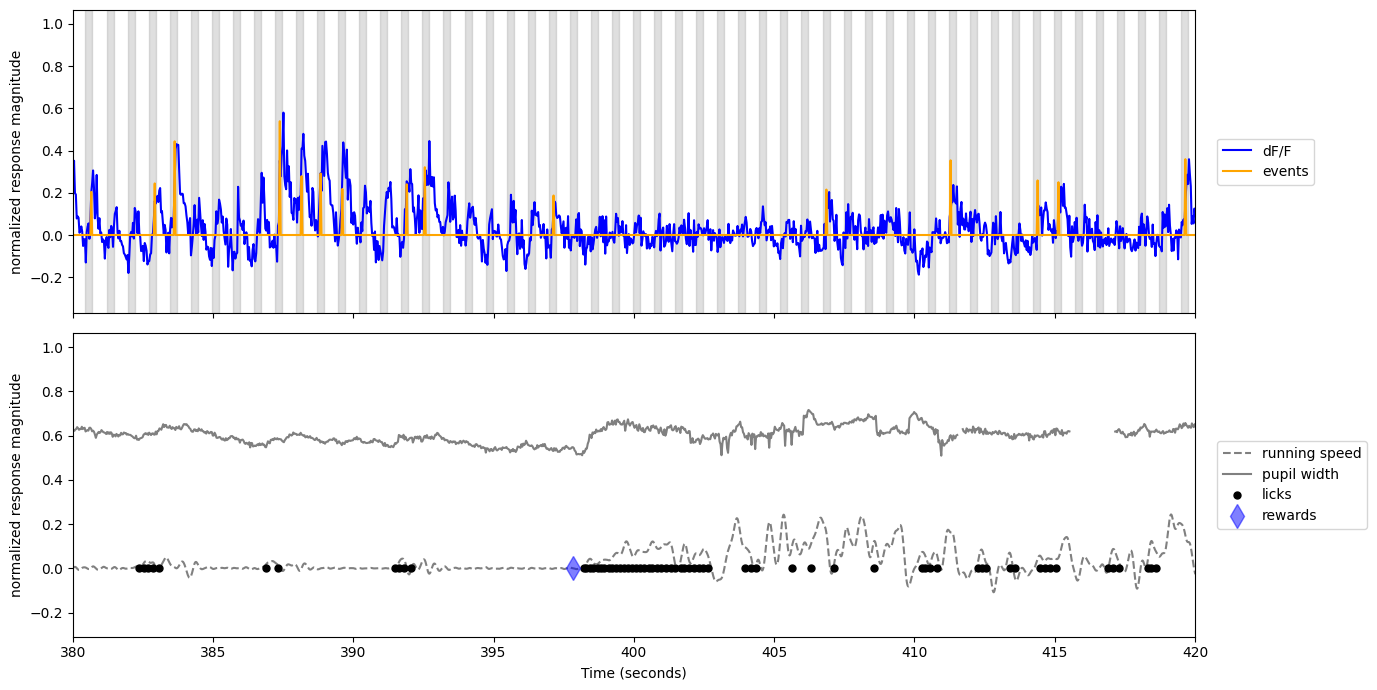

In [84]:
roi = 0
initial_time = 380
final_time = 420

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

# plot df/F 
ax1.plot(ophys_timestamps, 
         dff_traces.iloc[roi]['dff']/dff_traces.iloc[roi]['dff'].max(), 
         color='blue', label='dF/F')

# plot events 
ax1.plot(ophys_timestamps, 
         events.iloc[roi]['events']/events.iloc[roi]['events'].max()
         , color='orange', label='events')

# plot stimulus presentations 
for idx, stimulus in stimulus_table.iterrows():
    ax1.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)
ax1.set_ylabel('normalized response magnitude')
ax1.set_xlim([initial_time, final_time])
ax1.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# plot running speed - normalized by max 
ax2.plot(
    ophys_experiment.running_speed.timestamps,
    ophys_experiment.running_speed.speed / ophys_experiment.running_speed.speed.max(), 
    '--', color = 'gray', label='running speed'
)

# plot pupil area - normalized by max 
ax2.plot(
    ophys_experiment.eye_tracking.timestamps,
    ophys_experiment.eye_tracking.pupil_width / ophys_experiment.eye_tracking.pupil_width.max(), 
    color = 'gray',label='pupil width'
)
# plot licks
ax2.plot(
    ophys_experiment.licks.timestamps,
    np.zeros_like(ophys_experiment.licks.timestamps),
    marker='o', color='black', linestyle='none', markersize=5, label='licks'
)

# plot rewards 
ax2.plot(
    ophys_experiment.rewards.timestamps,
    np.zeros_like(ophys_experiment.rewards.timestamps),
    marker='d', color='blue', linestyle='none', markersize=12, alpha=0.5, label='rewards'
)
ax2.set_xlim([initial_time, final_time])
ax2.set_ylabel('normalized response magnitude')
ax2.set_xlabel('Time (seconds)')
ax2.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Summarize the dataset features:**

Now that we've shown how to use the AllenSDK to access and find features about the Visual Behavior Ophys dataset, let's summarized what we've found. Attached is a Google sheet where we'll document key information about the datasets.

[SWDB Dataset Features Spreadsheet](https://docs.google.com/spreadsheets/d/1zwqS97x81jEVUUMTLLtlk6NMMR2C7DhY9nJDB2BLvBE/edit?usp=sharing)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Class exercise:** 
    
Split up into groups and select a different Brain Observatory dataset. Using the AllenSDK and the SWDB Data Book, try to fill out the Dataset Features Spreadsheet with information about your assigned data. At the end, we'll come together and discuss what we've found, what we tried, what was difficult, etc. 

**Further Discussion:** 
    
Select a dataset and discuss: 
1. What interests you about the dataset? What are unique features that distinguish it from others? 
2. What are some scientific questions you could answer with this dataset? What are the next steps you would take to approach the question? 
2. Are there any limitations to consider or uncertainties to verify before working with this dataset? 
</div>